# AfterWork Data Science: Data Visualisation with Python Project

## 1. Defining the Question

### a) Specifying the Data Analysis Question

Specify the reasearch question that you'll be answering.

>Provide strategy recommendations that will lead to revenue growth based on the information available on bookings among other features.

### b) Defining the Metric for Success

The solutions to the following questions will help us answer our research question:

1. When is the best time of year to book a hotel room?
2. When is the optimal length of stay in order to get the best daily rate? 
3. How will you know if a hotel was likely to receive a disproportionately high number of special requests?

### c) Understanding the context 

The research is focused on revenue management in the hospitality industry. <p>As a Data Analyst working for Hilton International Hotels, you are provided with information on the various chain of hotels, which more on, includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Its from this hotel information that you are required to draw insights and advice the management on strategies to grow revenue.

### d) Recording the Experimental Design

We will apply The Cross Industry Standard Process for Data Mining (CRISP-DM) methodology to address the need in this research.

1. Business Understanding
    - Understanding the business goal
    - Situation assessment
    - Translating the business goal in a data analysis objective
    - Development of a project plan
2. Data understanding
    - Considering data requirements
    - Initial data collection, exploration, and quality assessment
3. Data preparation
    - Selection of required data
    - Data acquisition
    - Data integration and formatting
    - Data cleaning
    - Data transformation and enrichment
4. Deployment / Solution Implementation

### e) Data Relevance

The given dataset (sanitized) has relevant data on hotel reservations and which will help in answering the research question. However, We will need to find out the importance of these features relative to answering specific questions of this research.

A detailed description of the features, their origin, and the engineering procedures employed in its creation can be gor from [here](https://drive.google.com/file/d/142prPiIvYk-fGkYtyoOKFJkw-KDWeUZq/view?usp=sharing).

## 2. Reading the Data

In [ ]:
# Loading the required Python libraries

# Importing pandas
import pandas as pd

# Importing matplotlib (plotting library) for visualisation
# make all graphs that we draw to be within you notebook.
import matplotlib.pyplot as plt
% matplotlib inline          

# Importing seaborn, an advanced data visualization library 
# built on top of Matplotlib library.
import seaborn as sns 


# Import numpy library for extended array operations
import numpy as np


In [ ]:
# Loading the datasets into pandas dataframe objects

# Connecting to Google drive to access source files and load dataset to colab.
from google.colab import drive
drive.mount('/content/drive')

# Setting the data access location in Google drive.
data_set_url = '/content/drive/My Drive/Colab Notebooks/Afterwork Fellowship [Nov 2020]/hotel_bookings.csv'


# reading data into a pandas dataframe
hotel_df = pd.read_csv(data_set_url)

Mounted at /content/drive


In [ ]:
# Checking the first 5 rows of data
# ---

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the last 5 rows of data
# ---

hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Given the size of the dataframe, we can also achieve the above two using a single statement.

hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Sample 10 rows of data
# ---

hotel_df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
66183,City Hotel,1,87,2017,April,15,15,2,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,95.00,0,0,Canceled,2017-01-18
113048,City Hotel,0,20,2017,May,22,30,0,3,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,133.33,0,1,Check-Out,2017-06-02
109692,City Hotel,0,64,2017,April,15,13,0,2,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,NaN,0,Transient,130.50,0,0,Check-Out,2017-04-15
5372,Resort Hotel,1,6,2016,April,18,27,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,250.0,NaN,0,Transient-Party,72.00,0,0,Canceled,2016-04-22
13570,Resort Hotel,1,161,2017,August,34,20,2,3,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,236.00,0,1,Canceled,2017-03-27
15811,Resort Hotel,0,11,2015,July,31,31,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,241.0,NaN,0,Transient,142.71,0,0,Check-Out,2015-08-03
37962,Resort Hotel,0,327,2017,June,26,26,3,6,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,40.0,NaN,0,Transient,103.70,0,0,Check-Out,2017-07-05
5126,Resort Hotel,0,185,2016,April,17,18,1,1,1,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,1,No Deposit,298.0,NaN,0,Transient-Party,54.50,0,0,Check-Out,2016-04-20
97081,City Hotel,0,243,2016,September,37,9,1,2,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,106.20,0,2,Check-Out,2016-09-12
37012,Resort Hotel,0,122,2017,May,22,28,2,5,2,2.0,0,BB,GBR,Direct,Direct,0,0,0,G,G,0,No Deposit,250.0,NaN,0,Transient,149.14,0,3,Check-Out,2017-06-04


In [ ]:
# Checking number of rows and columns
# ---

hotel_df.shape

(119390, 32)

In [ ]:
# Checking datatypes
# ---

hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

****
**Observations:**

* The dataset is well structured with standardized feature names.
* All features of the dataset can be categorized as either object, int64 or float64.
* The dataset has 119,390 hotel booking records each with 32 features.



## 3. External Data Source Validation

The data is originally from the article Hotel Booking Demand Datasets, by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. This can be acessed from [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0010://).

## 4. Data Preparation

### Performing Data Cleaning

In [ ]:
# Checking datatypes and missing entries of all the variables
# ---

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

****
**Observations:**

* The dataset has 4 variables of float64 datatype, 16 of int64 and 12 variables of object datatype.
* Apart from four fields, i.e. `country`, `children`, `company` and `agent` which have null values, all other fields are well populated.

    Referencing the glossary of this data from the source doument, we learn that the null entries in these two fields can actually be taken to be valid data (not missing records) to mean that the companies do not have any recordable IDs. 



In [ ]:
# Checking how many duplicate rows are there in the data
# ---

hotel_df.duplicated().any()

True

In [ ]:
hotel_df.duplicated().sum()

31994

In [ ]:
hotel_df[hotel_df.duplicated()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


*****
**Observations:**

We have 31,994 duplicated rows. However, we choose to keep the duplicates because we don't have a unique identifier to actually proof that these are duplicates.

In [ ]:
# Checking if any of the columns are all null
# ---

hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

****
**Observations**:

* We do not have any columns with all values being NULL.
* We have duplicate records in the recordset but since we do not have a unique identifier in our dataset, probably due to sanitization exercise on the data, we will retain the records. As a matter of fact, the data is absolutely useful in the research in this state.



In [ ]:
# Checking if any of the rows are all null
# ---
hotel_df.isnull().all(1)

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [ ]:
idx = hotel_df.index[hotel_df.isnull().all(1)]
nans = hotel_df.index[idx]
nans

Int64Index([], dtype='int64')

**** 
**Observations:**

* We neither have rows nor columns with all null values.

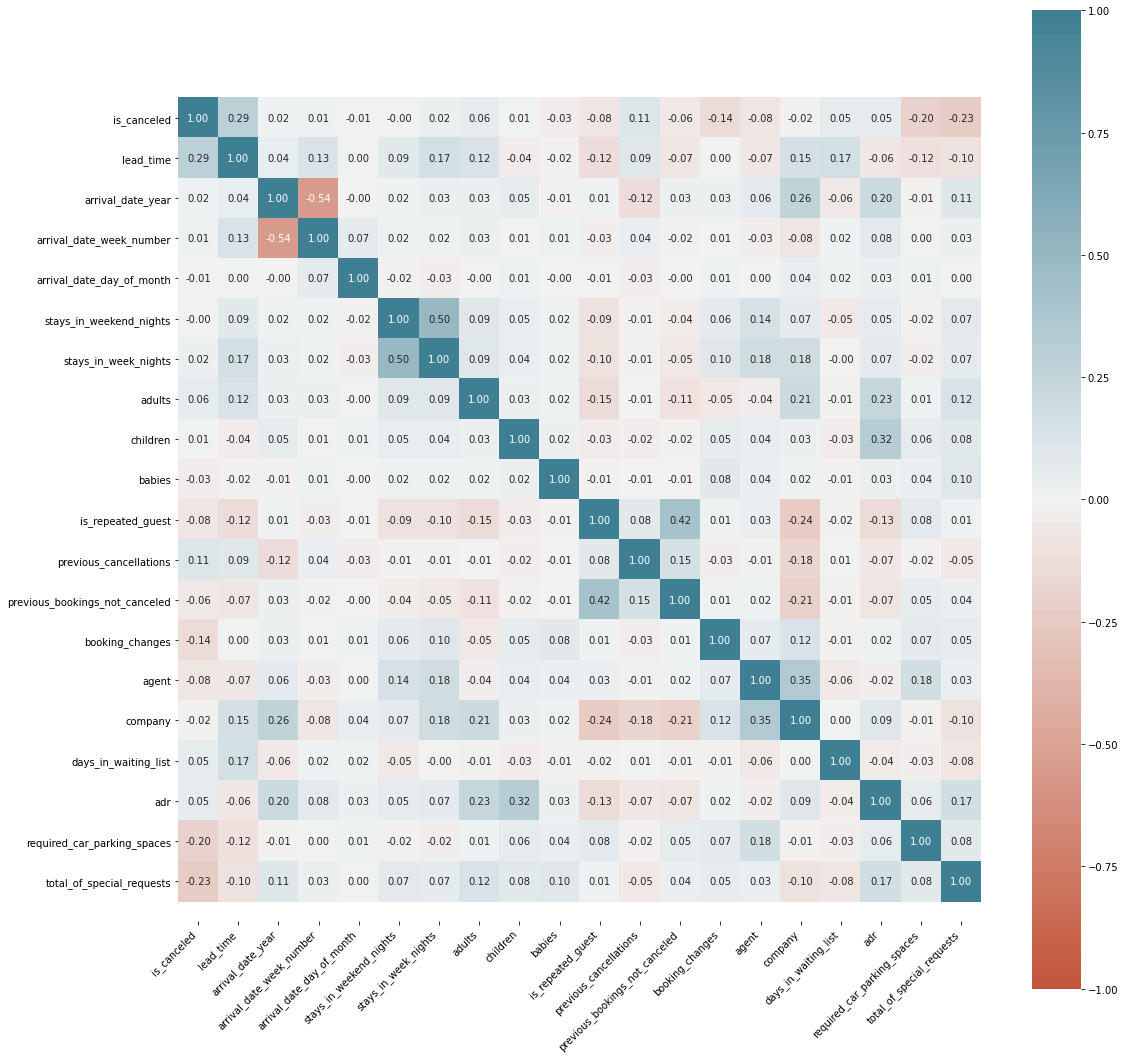

In [ ]:
# Checking the correlation of the features through the use of visualizations the correlation using heatmap
# ---

corr = hotel_df.corr()

plt.figure(figsize=(18, 18))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

****
**Observations:**
* We do not have any significant correlations between the given numerical features. `arrival_date_week_number` and `arrival_date_year` pair as well as `stay_in_week_nights` and `stay_in_weekend_nights` pair are the only two moderately related variables with coefficients of 0.54 and 0.50 accordingly.


In [ ]:
# Dropping company column because it has alot of missing values 
# and we won't need to answer any of our questions
# ---

hotel_df.drop('company', axis=1, inplace=True)

In [ ]:
hotel_df.shape

(119390, 31)

From the data variable description we see that the Distribution Channel category gives information about Booking distribution.

1. The term “TA” means “Travel Agents” 
2. The term “TO” means “Tour Operators”

This allows us to fill the missing values in the agents column with TO

In [ ]:
# We replace the mising values i.e. for TO
# ---


# Clarification sought here as agent field is numerical to hold IDs of the agents who made the booking.

In [ ]:
# We drop rows where there is no adult, baby and child as these records won't help us.
# ---

rows_to_remove = hotel_df.index[(hotel_df['adults']==0) & (hotel_df['babies']==0) & (hotel_df['children']==0)]
hotel_df.drop(rows_to_remove, axis=0, inplace=True)
hotel_df.shape

(119210, 31)

In [ ]:
# We replace missing children values with rounded mean value
# first check the count of the records to be affected.

hotel_df['children'].isna().sum()

4

In [ ]:
#replace the values.

hotel_df['children'].fillna(round(hotel_df['children'].mean()), inplace = True)
hotel_df['children'].isna().sum()

0

In [ ]:
# Checking for missing values in the dataframe
# ---

hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             478
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16280
days_in_waiting_list                  0


In [ ]:
print(hotel_df['children'].dtypes)
print(hotel_df['agent'].dtypes)

float64
float64


In [ ]:
# Converting the datatypes of the following columns from float to integer
# i.e. children, agent

hotel_df['children'] = hotel_df['children'].apply(np.int64)
print(hotel_df['children'].dtypes)

int64


In [ ]:
# Agent column contains null values and so we first fill the nulls with 0s.
# then proceed to convert the datatype.
#pd.to_numeric(hotel_df['agent'], errors='coerce')

hotel_df['agent'].fillna(0, inplace = True)
hotel_df['agent'] = hotel_df['agent'].astype(int)
print(hotel_df['agent'].dtypes)

int64



## 5. Solution Implementation

Here we investigate the questions that would help us with our recommendations.

### 5.a) Questions

0    75011
1    44199
Name: is_canceled, dtype: int64 



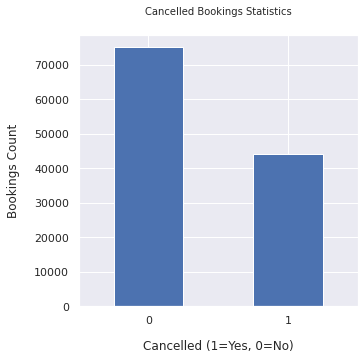

In [ ]:
# 1. How many bookings were cancelled?
# ---

# Which data to use? basic column is `is_cancelled`
print(hotel_df['is_canceled'].value_counts(),"\n")


# plotting this data on a bar plot  

# Setting the font size of the text in our visualistion
sns.set(font_scale=1)

# We now plot our visualisation. 
hotel_df['is_canceled'].value_counts().plot(kind='bar', figsize=(5, 5), rot=0)

# x axis label and also add spacing from the axis
plt.xlabel("Cancelled (1=Yes, 0=No)", labelpad=14)

# y axis label and add spacing from the axis
plt.ylabel("Bookings Count", labelpad=14)

# We also set the title of our plot and adjust the space 
plt.title("Cancelled Bookings Statistics", y = 1.05, fontsize = 10);

In [ ]:
# 2. What was the booking ratio between resort hotel and city hotel?

# Select positive bookings (not cancelled).
df_not_canceled = hotel_df[hotel_df['is_canceled'] == 0]
df_not_canceled.shape

(75011, 31)

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64 

The ratio of of Resort Hotel to City Hotel bookings is 1 : 1.59


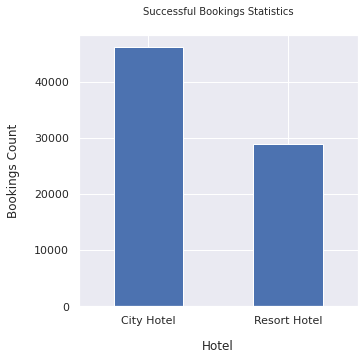

In [ ]:
# Plotting a bar plot of booking ratio between resort hotel and city hotel
print(df_not_canceled['hotel'].value_counts(),"\n")


# plotting this data on a bar plot  

# Setting the font size of the text in our visualistion
sns.set(font_scale=1)

# We now plot our visualisation. 
df_not_canceled['hotel'].value_counts().plot(kind='bar', figsize=(5, 5), rot=0)

# x axis label and also add spacing from the axis
plt.xlabel("Hotel", labelpad=14)

# y axis label and add spacing from the axis
plt.ylabel("Bookings Count", labelpad=14)

# We also set the title of our plot and adjust the space 
plt.title("Successful Bookings Statistics", y = 1.05, fontsize = 10);

print('The ratio of of Resort Hotel to City Hotel bookings is 1 :', str(round(46084/28927,2)))

arrival_date_year
2015    13826
2016    36299
2017    24886
dtype: int64 



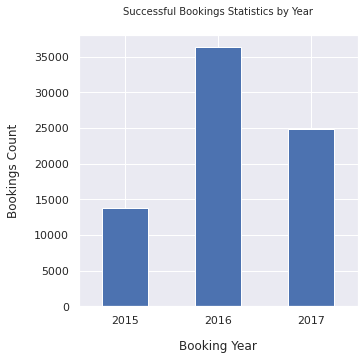

In [ ]:
# 3. What was the percentage of booking for each year?
# we will consider positive booking per year 

print(df_not_canceled.groupby('arrival_date_year').size(), "\n")

# Plotting the corresponding bar plot

# Setting the font size of the text in our visualistion
sns.set(font_scale=1)

# We now plot our visualisation. 
df_not_canceled.groupby('arrival_date_year').size().plot(kind='bar', figsize=(5, 5), rot=0)

# x axis label and also add spacing from the axis
plt.xlabel("Booking Year", labelpad=14)

# y axis label and add spacing from the axis
plt.ylabel("Bookings Count", labelpad=14)

# We also set the title of our plot and adjust the space 
plt.title("Successful Bookings Statistics by Year", y = 1.05, fontsize = 10);

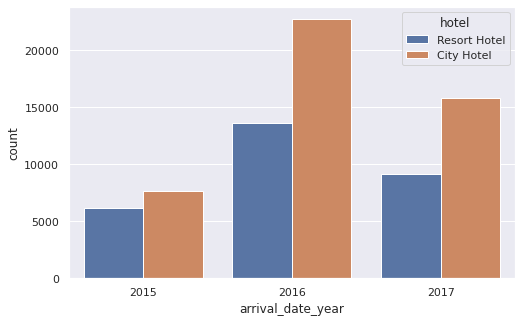

In [ ]:
# Separating the data by hotel
# ---
# 
plt.subplots(figsize=(8,5))

sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

Text(0.5, 1.0, 'Booking Trend (Monthly)')

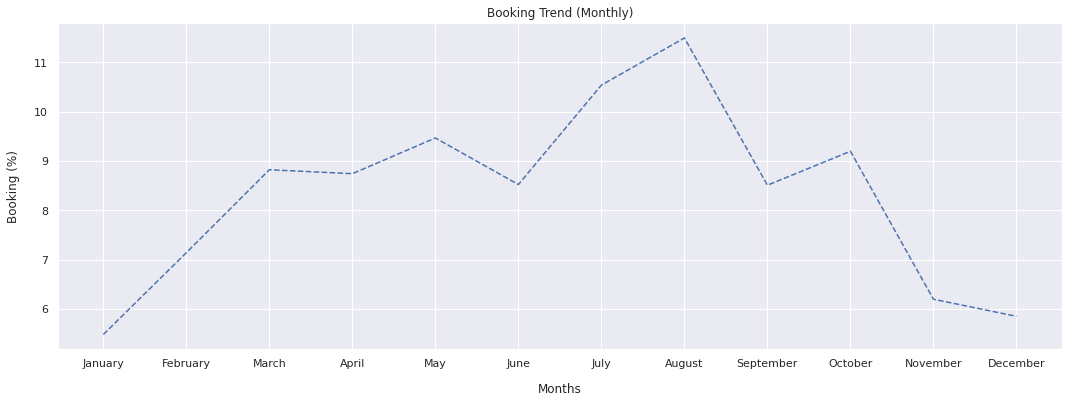

In [ ]:
# 4. Which were the most busiest months for hotels?

# We would like to use our months in our x-axis so we set that
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

# Plotting our visualisation

# plt.plot(x, y, xlabel='Months', ylabel='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))
fig = plt.figure(figsize = (18, 6))
plt.plot(x, y, linestyle='dashed')
plt.xlabel("Months", labelpad=14)
plt.ylabel("Booking (%)", labelpad=14)
plt.title('Booking Trend (Monthly)')

In [ ]:
# Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Select only City Hotel
sorted_months = df_not_canceled.loc[hotel_df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)
x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

# Select only Resort Hotel
sorted_months = df_not_canceled.loc[hotel_df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)
x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

Text(0.5, 1.0, 'Booking Trend (Monthly)')

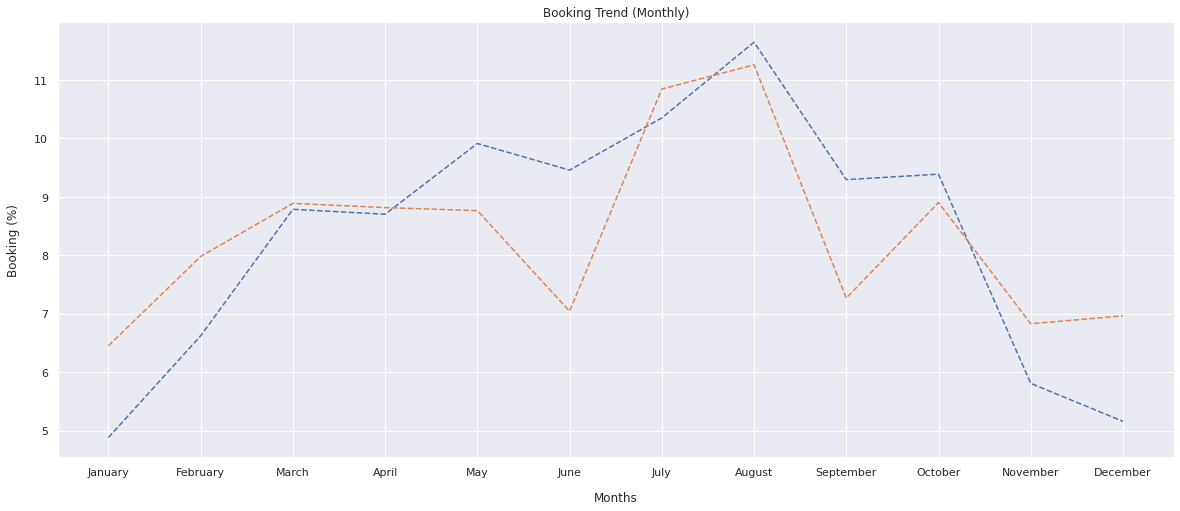

In [ ]:
# Drawing the line plot

fig = plt.figure(figsize = (20, 8)) 
plt.plot(x1, y1, linestyle='dashed')
plt.plot(x2, y2, linestyle='dashed')
plt.xlabel("Months", labelpad=14)
plt.ylabel("Booking (%)", labelpad=14)
plt.title('Booking Trend (Monthly)')


In [ ]:
# 5. From which top 3 countries did most guests come?

df_countries = df_not_canceled.country.value_counts()
df_countries

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
NCL        1
ZMB        1
MMR        1
DMA        1
CYM        1
Name: country, Length: 165, dtype: int64

5. The top three countries were Portugal, Great Britain and France in that order with 20,977guests, 9,668 guests and 8,468 guests respectively.

In [ ]:
# 6.a) How long do most people stay in hotels?
#   b) By city and resort? Separate the data by hotel

# Calculating the total nights
# df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']

df_not_canceled['total_nights'] = df_not_canceled.apply(lambda row: row.stays_in_weekend_nights + 
                                  row.stays_in_week_nights, axis = 1) 

In [ ]:
# a) How long do most people stay in hotels?

df_not_canceled['total_nights'].mean()

3.390062790790684

In [ ]:
# b) By city and resort? 

df_not_canceled['total_nights'].groupby(df_not_canceled['hotel']).mean()

hotel
0               0.000000
City Hotel      2.917889
Resort Hotel    4.142432
Name: total_nights, dtype: float64

6. On average, guests are accomodated in the hotel for about 3 and a quarter days. However we notice that Resort Hotel tend to accomodate guests for longer i.e 4 days as compared to City Hotel whose average spend is about 3 days.

A    52248
D    13078
E     4611
F     2014
G     1329
B      748
C      622
H      356
L        4
Name: reserved_room_type, dtype: int64 
 


Text(0.5, 1.05, 'Distribution of Bookings by Room Types')

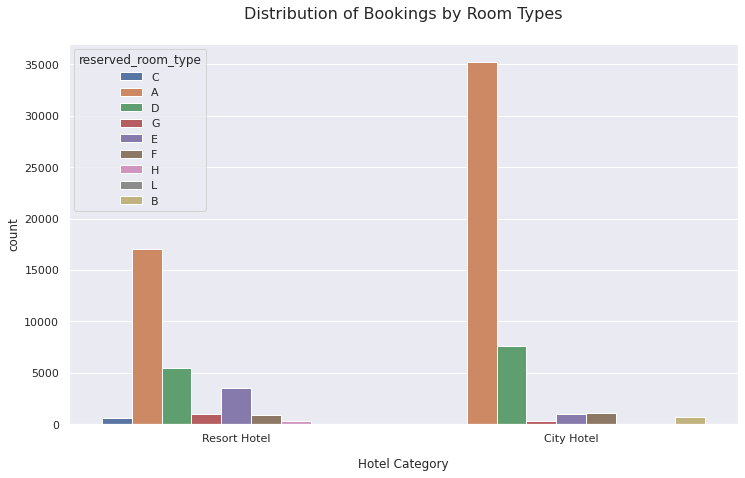

In [ ]:
# 7. Which was the most booked accommodation type (Single, Couple, Family)?


# Select Single, Couple, Multiple Adults and Family 
# single   = df_not_canceled[((df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0))]


# I see very many commbinations of these logical operators, aas a matter of fact, the example given  for single reservation may not be complete because we have records with 
# no adult but a single child... and therefore I opted to use the reservations type column for this exercise.

# Performing our plot
print(df_not_canceled.reserved_room_type.value_counts(), '\n ')

plt.subplots(nrows=1, ncols=1, figsize=(12,7))
sns.countplot(x='hotel', hue='reserved_room_type',  data=df_not_canceled);
plt.xlabel("Hotel Category", labelpad=14)
plt.title("Distribution of Bookings by Room Types", y = 1.05, fontsize = 16)

7. From the analysis above, we notice that category A of rooms had the highest reservations in both hotels, but higher in City Hotel, This was followed by Category D of the rooms but preference changed. Room category D is more preferred in the City Hotel than in the Resort Hotel. We also notice that Category E is preferred in Resort Hotel way more than it is in City Hotel.

### 5.b) Recommendations

From the above analysis, below are our recommendations:

1.   We notice that the bookings peak in the 3rd quarter of the year, between July and September for whatever reasons. We will need to investigate these reasons further using other data not necessarily in this dataset.
2.   Some categories of rooms are more preferred in one hotel over the other. Hotel Intercontinental should employ focus strategy where one hotel concentrates on where it does best. see my comment # 7 above.
3. Hotels are usually know to peak during the 4th quarter of the year, but in this case, reservations are at the lowest for Hotel Intercontinetal. Reasons for this could be investigated by for instance comparing competitor data against their own for the same period of business.
4. City Hotel has outshone Resort Hotel in all the three years of business reviewed. A closer look into the business aspects that could be causing this is called for. 
5. Something was done right between 2015 and 2016 as reservations shot tremendously. probably the business environment was favourable then, orthe management had its grip on business expenses, however the trend was reserved come 2016/2017 period when the business went down, but thankfully not a low as in 2015.





## 6. Challenging your Solution (Solution Review)

1. When should hotels provide special offers?
From the occupancy indicated in the above plots, and from practice, special offers apply to boost business, in the case of hopitality industry, the reservations. It would help to have information on capacity so that we try to get a benchmark on the low occupancy and average occupancy of the hotels.

2. Also, we could have the non-numerical features which are categorical coded with integers so as to achieve their visibility in correlation matrix, as well as to aid in other descriptive statistics (mean, median, mode, percentiles, etc.)

3. Though we dropped the feature `company` as  it had alot of NULL entries (given that the companies do not have valid IDs) and that it didn't have alot of importance in or research, the hotel could develop its own identification of the hotels so that it can identify company customers and strategically be able to classify them etc. it could also help in targetted marketing specific to the companies.

### 7. Follow up questions

#### a). Did we have the right data?

The data provided is quite relevant though it may have not been complete as given in the section below. As part of the data quality checks against standard data quality dimensions, we have removed irreelevant data (company column as well as other records where there were no human beings in the bookings), data relevance, we created mutated fields for ease of analysis like the total_nights. 

The dataset had onsistent data in all the columns and with no much need for editing. few records had mising / null records after the cleanup which provided a reliable dataset for our research.

#### b). Do we need other data to answer our question?

Other data that may help in this case could include marketing campaigns costs and their respective period. This would guide in discovering any correlation between marketing efforts and increased bookings.

Similary, an indicator of revenues could also help.

Competitor business data for the same period could provide additional insights on the landcape of the industry.

#### c). Did we have the right question?

We had the right questions to lead towards the research question, however there are other right questions that we needed to ask for instance...

1. Whats is the full capacity of the hotels? this will guide us to know the occupancy at any given time.

2. What did the hotel do right in 2016 when business shot up considerably.
3. There is a considerable difference between local tourism and international tourism... (further reading on the dataset proposes that the Hotels are in portugal) What can be done to promote international tourism?

Acknowledgements <br>
* The data is originally from the article Hotel Booking Demand Datasets by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

* Many thanks to [AfterWork Data Science](https://afterwork.ai/) Fellowship crew for the opportunity to train and exercise on this dataset.